# Jonathan Halverson
# Saturday, April 2, 2016
# Simple one sample t-test and nonparametric statistics

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

### First create the population from a normal distribution:

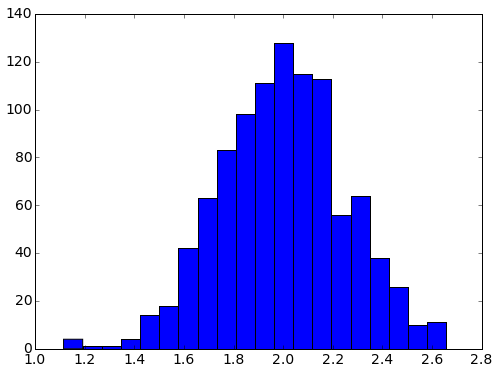

In [28]:
from scipy.stats import norm
population = norm.rvs(loc=2, scale=0.25, size=1000)
n, bins, patches = plt.hist(population, bins=20)

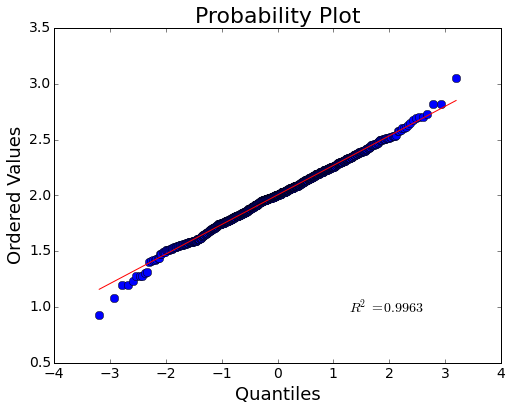

In [27]:
from scipy.stats import probplot
(osm, osr), (slope, intercept, r) = probplot(population, plot=plt)

### Create a sample from the population of size 25:

In [33]:
import random
sample = np.array(random.sample(population, k=25))

### Perform a 1 sample t-test (two-tailed) to determine if the mean of the sample is consistent with the population:

In [37]:
from scipy.stats import ttest_1samp
T, p_value = ttest_1samp(sample, population.mean())
T, p_value

(-0.22387284398414398, 0.82475103492561452)

### Indeed the p-value is much larger than 0.05 suggesting that the null hypothesis is true. The same calculation could be done manually:

In [43]:
from scipy.stats import t
SE = sample.std(ddof=1) / np.sqrt(sample.size)
T = (sample.mean() - population.mean()) / SE
p_value = 2 * t.cdf(-abs(T), df=sample.size - 1)
print T, p_value

-0.223872843984 0.824751034926


# Nonparametric statistics

### In the above case, the population was in fact normal since the random variates were drawn from a normal distribution. In cases where the population does not follow such a distribution, nonparametric approaches must be used. Note that in some cases this is not necessary if a large sample size is available (CLT).

### Here we revisit the paired data for the price of textbooks:

In [46]:
import pandas as pd
df = pd.read_csv('textbooks.txt', sep='\t')
from scipy.stats import wilcoxon
T, p_value = wilcoxon(df['uclaNew'], df['amazNew'])
T, p_value

(99.0, 9.2166163657799435e-12)

### The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

### The results suggest that x and y do not come from the same distribution. The same conclusion was reached using the parametric approach of the depedent t-test.